# Kieran Molloy UCDPA Project 
### Course CIDAB 2022-01-18
***

### Environment Information
<table align="left">
<tr>
    <th>Environment Type</th>
    <th>Anaconda Version</th>
    <th>Anaconda Build Channel</th>
    <th>Python Version</th>
</tr>
<tr>
    <td>Anaconda </td>
    <td>2021.11 </td>
    <td>py39_0 </td>
    <td>3.9.7 </td>
</tr>
</table>

## Links to Kaggle Datasource: 
***

#### _[Transactional Retail Dataset of Electronics Store](https://www.kaggle.com/datasets/muhammadshahrayar/transactional-retail-dataset-of-electronics-store)_

*  _[dirty_data.csv](https://www.kaggle.com/datasets/muhammadshahrayar/transactional-retail-dataset-of-electronics-store?select=dirty_data.csv)_
*  _[missing_data.csv](https://www.kaggle.com/datasets/muhammadshahrayar/transactional-retail-dataset-of-electronics-store?select=missing_data.csv)_
*  _[warehouses.csv](https://www.kaggle.com/datasets/muhammadshahrayar/transactional-retail-dataset-of-electronics-store?select=warehouses.csv)_


## Install Modules

In [156]:
# %pip install geopy
%pip install plotly

     |████████████████████████████████| 27.7 MB 3.8 MB/s eta 0:00:01
  Using cached tenacity-8.0.1-py3-none-any.whl (24 kB)
Note: you may need to restart the kernel to use updated packages.


## Import Modules
***

In [157]:
from matplotlib import pyplot as plt
from IPython.display import display 

import pandas as pd
import numpy as np
import seaborn as sns
import itertools
import time
from datetime import datetime

from geopy.distance import geodesic
from geopy.geocoders import Nominatim
import plotly.express as px 

## Set Variables
***

In [ ]:
dirty_data = 'dirty_data.csv'
missing_data = 'missing_data.csv'
warehouses = 'warehouses.csv'

## Functions
***

In [ ]:
def get_missing_nearest_warehouse(lat , Long ):
    ''' use coordinates to find the closest warehouse (clrow flies)'''
    
    # customer coordinates are provided
    coords_customer = lat, Long
    
    # get warehouse latitude and longitide from warehouse table
    coords_Nickolson = df_warehouses['lat'].loc[df_warehouses.index[0]], df_warehouses['lon'].loc[df_warehouses.index[0]]
    coords_Thompson = df_warehouses['lat'].loc[df_warehouses.index[1]], df_warehouses['lon'].loc[df_warehouses.index[1]]
    coords_Bakers = df_warehouses['lat'].loc[df_warehouses.index[2]], df_warehouses['lon'].loc[df_warehouses.index[2]]
    
    # use geodesic to do a km distance comparison return the min value
    Nickolson_cust_dist = geodesic(coords_customer, coords_Nickolson).km
    Thompson_cust_dist = geodesic(coords_customer, coords_Thompson).km
    Bakers_cust_dist = geodesic(coords_customer, coords_Bakers).km
    
    val = (Nickolson_cust_dist ,Thompson_cust_dist ,Bakers_cust_dist)
    
    min_dist = val.index(min(val))
    
    if min_dist == 0:
        warehouse = 'Nickolson'
        distance = Nickolson_cust_dist
        return(warehouse , distance)
    elif min_dist == 1:
        warehouse = 'Thompson'
        distance = Nickolson_cust_dist
        return(warehouse , distance)
    else: 
        warehouse = 'Bakers'
        distance = Nickolson_cust_dist
        return(str(warehouse) , distance)

In [ ]:
def get_missing_order_price(order_total, delivery_charges, coupon_discount):
    ''' calculate order_price from order_total, delivery_charges and coupon_discount '''
    order_price = (order_total - delivery_charges) / (100-coupon_discount) * 100
    return(round(order_price, 2))

In [ ]:
def get_missing_order_total(order_price, delivery_charges, coupon_discount):
    ''' calculate order_total from order_price, delivery_charges and coupon_discount'''
    order_total = order_price - (order_price / 100 * coupon_discount) + delivery_charges
    return(round(order_total, 2))

In [ ]:
def get_missing_season(date):
    '''calculate season from date'''
    # Spring = months 9,10,11
    # summer = months 12,1,2
    # Autumn = months 3,4,5
    # Winter = months 6,7,8

    month = date.month

    if month in [9,10,11]:
        season = 'Spring'
    elif month in [12,1,2]:
        season = 'Summer'
    elif month in [3,4,5]:
        season = 'Autumn'
    else:
        season = 'Winter'
    
    return(season)

In [ ]:
def get_geo_address(customer_id, lat, long):

    geolocator = Nominatim(user_agent="app")
    
    coordinates =  str(lat) + " " + str(long)

    location = geolocator.reverse(coordinates)
    address = location.raw['address']
    road = address.get('road', '')
    suburb = address.get('suburb', '')
    city = address.get('city', '')
    postcode = address.get('postcode', '')
    state = address.get('state', '')
    country = address.get('country', '')
    
    return(customer_id, road, suburb, city, postcode, state, country)

## CSV Initial Import for Review
***

In [ ]:
# read the CSV from the local Jupyter Notebook directory 
df_dirty_data = pd.read_csv(dirty_data)
df_missing_data = pd.read_csv(missing_data)
df_warehouses = pd.read_csv(warehouses)

## Initial CSV Review
***

### df_dirty_data dataframe review

In [ ]:
type(df_dirty_data)

In [ ]:
print(df_dirty_data.columns)

In [ ]:
df_dirty_data.head(10)

In [ ]:
# using display command for better formatting in Notebook , use print usually
display(df_dirty_data.describe())

In [ ]:
print(df_dirty_data.info())

In [ ]:
print(df_dirty_data.shape)

In [ ]:
print(df_dirty_data.isna().any())

In [ ]:
print(df_dirty_data.isna().sum())

### df_missing_data dataframe review

In [ ]:
type(df_missing_data)

In [ ]:
print(df_missing_data.columns)

In [ ]:
df_missing_data.head(10)

In [ ]:
# using display command for better formatting in Notebook , use print usually
display(df_missing_data.describe())

In [ ]:
print(df_missing_data.info())

In [ ]:
print(df_missing_data.shape)

In [ ]:
print(df_missing_data.isna().any())

In [ ]:
print(df_missing_data.isna().sum())

### df_warehouses dataframe review

In [ ]:
type(df_warehouses)

In [ ]:
print(df_warehouses.columns)

In [ ]:
type(df_warehouses)

In [ ]:
df_warehouses.head()

In [ ]:
# using display command for better formatting in Notebook , use print usually
display(df_warehouses.describe())

In [ ]:
print(df_warehouses.info())

In [ ]:
print(df_warehouses.shape)

In [ ]:
print(df_warehouses.isna().any())

In [ ]:
print(df_warehouses.isna().sum())

## Re-import from CSV
***

In [ ]:
# read the CSV from the local Jupyter Notebook directory 
# parsing dates on import since dates were objects also change datatype on order_price
df_dirty_data = pd.read_csv(dirty_data, parse_dates=['date'], dtype={'order_price': 'float'}) 
df_missing_data = pd.read_csv(missing_data, parse_dates=['date']) 

# cant use dtype={'is_happy_customer': 'bool'} because is_happy_customer contains NaN 

In [ ]:
print(df_dirty_data.info())

In [ ]:
print(df_missing_data.info())

In [ ]:
# check for orderid uniqueness in df_dirty_data
duplicate_dirty_data = df_dirty_data[df_dirty_data.duplicated(['order_id'])]
print(duplicate_dirty_data)

In [ ]:
# check for orderid uniqueness in df_missing_data 
duplicate_missing_data = df_missing_data[df_missing_data.duplicated(['order_id'])]
print(duplicate_missing_data)

In [ ]:
# create an order_id index on df_dirty_data
df_dirty_data.set_index('order_id',inplace=True)

In [ ]:
# create an order_id index on df_missing_data
df_missing_data.set_index('order_id',inplace=True)

In [ ]:
df_dirty_data.index

In [ ]:
df_missing_data.index

# Detect and fix errors in df_dirty_data
***

In [ ]:
# show missing values - none found
print(df_dirty_data.isna().sum())

In [ ]:
print(df_dirty_data.info())

In [ ]:
display(df_dirty_data.head())

In [ ]:
columns = df_dirty_data.columns
print(len(columns))

### Rename 'nearest_warehouse' values

In [ ]:
# getting the unique values for 'nearest_warehouse'
nearest_warehouse = df_dirty_data['nearest_warehouse'].sort_values().unique()
print(nearest_warehouse)

In [ ]:
df_dirty_data['nearest_warehouse'] = df_dirty_data['nearest_warehouse'].str.title()

### Rename 'season' values

In [ ]:
# getting the unique values for 'season'
season = df_dirty_data['season'].sort_values().unique()
print(season)

In [ ]:
df_dirty_data['season'] = df_dirty_data['season'].str.title()

### Check 'order_price' and 'order_total' values dont seem correct

In [ ]:
type(df_dirty_data[['order_price','delivery_charges','coupon_discount','order_total']])

In [ ]:
arr = df_dirty_data[['order_price']]

print("Q2 quantile of order_price : ", np.quantile(arr, .50))
print("Q1 quantile of order_price : ", np.quantile(arr, .25))
print("Q3 quantile of order_price : ", np.quantile(arr, .75))
print("100th quantile of order_price : ", np.quantile(arr, .1))


In [ ]:
# sorted by 'order_total','order_price'
df_dirty_data[['shopping_cart','order_price','delivery_charges','coupon_discount','order_total']].sort_values(ascending = False, by=['order_total','order_price']).head(40)

In [ ]:
# sorted by 'order_price','order_total'
df_dirty_data[['shopping_cart','order_price','delivery_charges','coupon_discount','order_total']].sort_values(ascending = False, by=['order_price','order_total']).head(40)

In [ ]:
# sorted by 'order_total','order_price'
df_dirty_data[['shopping_cart','order_price','delivery_charges','coupon_discount','order_total']].sort_values(ascending = False, by=['order_price','shopping_cart']).head(40)

In [ ]:
### Check lat and Longitude, valuse seem incorrect , some lat values are negative some are not

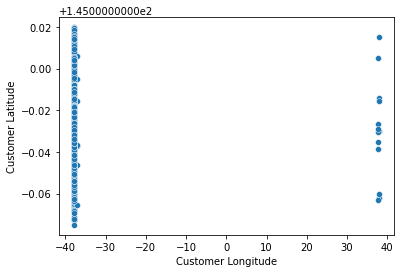

In [155]:

sns.scatterplot(x='customer_lat', y='customer_long' ,data=df_dirty_data)
# plt.title('df_dirty_data Latitude and Longitude')
# Set x-axis label
plt.xlabel('Customer Longitude')
# Set y-axis label
plt.ylabel('Customer Latitude')
height = 20
plt.show()

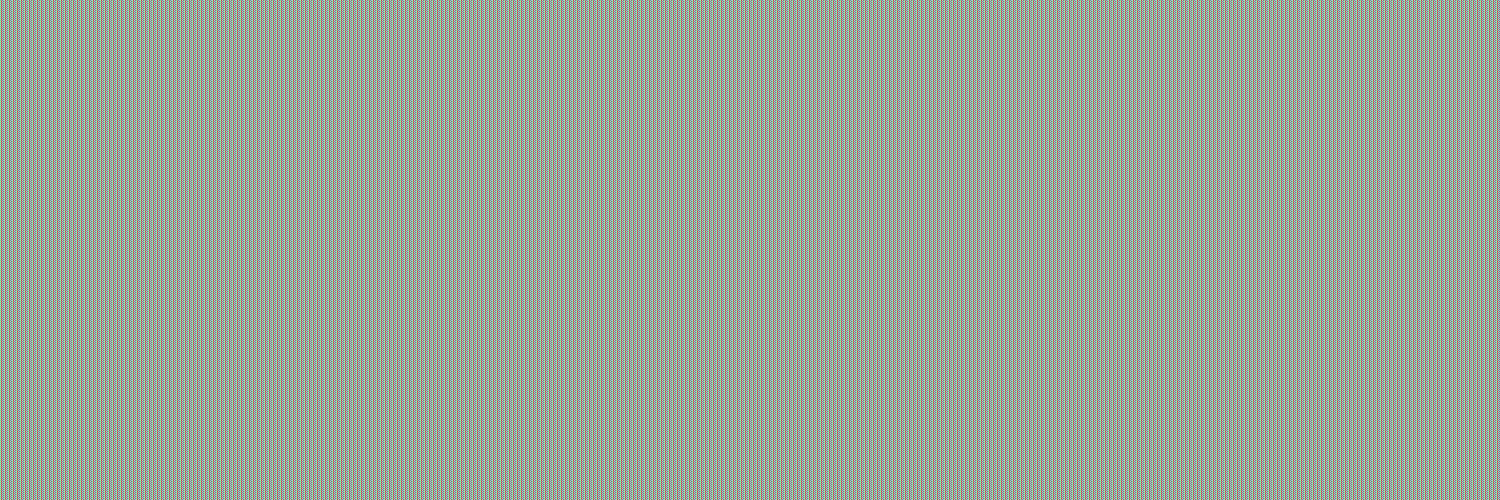

In [211]:
# map shows us there are coordinates off the cost of Japan , which seems incorrect
# zoom on the map for closer inspection
fig = px.scatter_geo(df_dirty_data, lat='customer_lat',lon='customer_long', height=500)
fig.update_layout(geo = dict(projection_scale=2,center=dict(lat=-2, lon=160)))
fig.show()

fig = px.scatter_geo(df_dirty_data, lat='customer_lat',lon='customer_long', height=500)
fig.update_layout(geo = dict(projection_scale=2,center=dict(lat=-2, lon=160)))
fig.show()


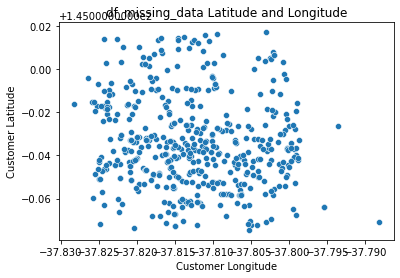

In [183]:
# here we can see thescatterplot contains an even distribution for negative latitude values
sns.scatterplot(x='customer_lat', y='customer_long',data=df_missing_data)
plt.title('df_missing_data Latitude and Longitude')
# Set x-axis label
plt.xlabel('Customer Longitude')
# Set y-axis label
plt.ylabel('Customer Latitude')
plt.show()

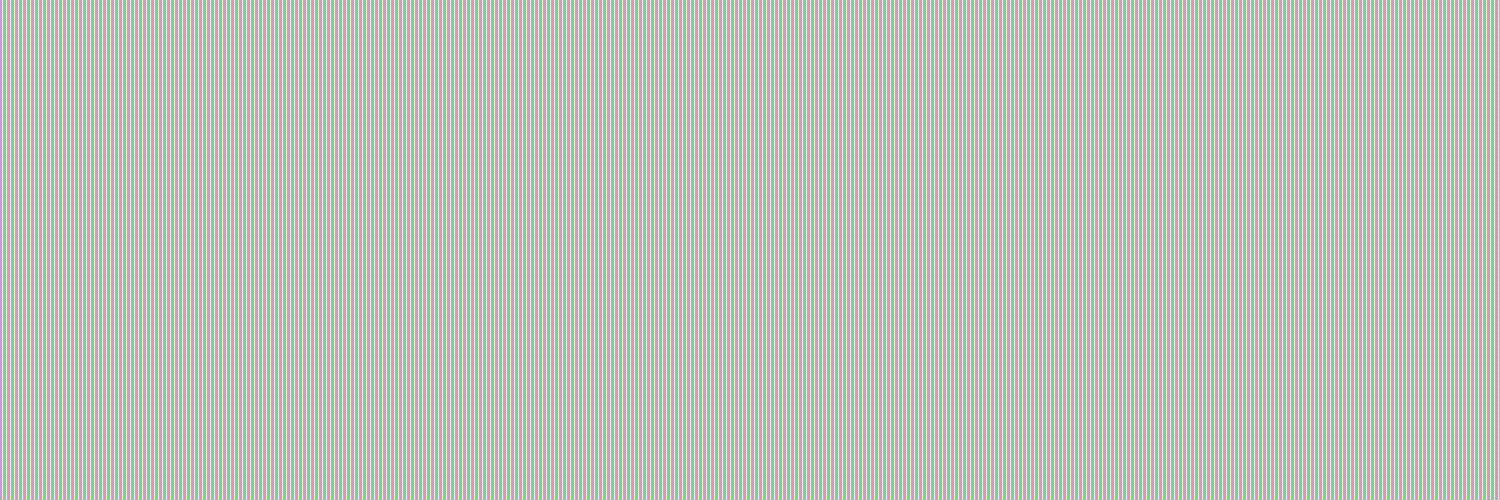

In [209]:
fig = px.scatter_geo(df_missing_data, lat='customer_lat',lon='customer_long', height=500)
fig.update_layout(geo = dict(projection_scale=2,center=dict(lat=-2, lon=160)))
fig.show()

# Fix missing values in df_missing_data
***

In [ ]:
# show missing values
print(df_missing_data.isna().sum())

### Fix missing 'nearest_warehouse' values

In [ ]:
# getting rows for the missing values for 'nearest_warehouse'
nearest_warehouse_to_update = df_missing_data[df_missing_data['nearest_warehouse'].isna()]

# using display command for better formatting in Notebook , use print usually
display(nearest_warehouse_to_update)

In [ ]:
# getting index for the the missing values for 'nearest_warehouse'
nearest_warehouse_indexto_update = df_missing_data[df_missing_data['nearest_warehouse'].isna()].index
print(nearest_warehouse_indexto_update)

In [ ]:
# updating missing values for 'nearest_warehouse'
for i, row in nearest_warehouse_to_update.iterrows():
    df_missing_data.at[i,'nearest_warehouse'] = get_missing_nearest_warehouse(df_missing_data.at[i,'customer_lat'],df_missing_data.at[i,'customer_long'])[0]

In [ ]:
# no more missing values for 'nearest_warehouse'
print(df_missing_data[df_missing_data['nearest_warehouse'].isna()])

In [ ]:
#check the indexes for the update 'nearest_warehouse' --  all done
display(df_missing_data[['nearest_warehouse']].loc[nearest_warehouse_indexto_update])

### Fix missing 'order_price' values

In [ ]:
# getting rows for the missing values for 'order_price'
order_price_to_update = df_missing_data[df_missing_data['order_price'].isna()]

# using display command for better formatting in Notebook , use print usually
display(order_price_to_update)

In [ ]:
# getting index for the the missing values for 'order_price'
order_price_indexto_update = df_missing_data[df_missing_data['order_price'].isna()].index
print(order_price_indexto_update)

In [ ]:
# updating missing values for 'order_price'
for i, row in order_price_to_update.iterrows():
    df_missing_data.at[i,'order_price'] = get_missing_order_price(df_missing_data.at[i,'order_total'],df_missing_data.at[i,'delivery_charges'],df_missing_data.at[i,'coupon_discount'])

In [ ]:
# no more missing values for 'order_price'
print(df_missing_data[df_missing_data['order_price'].isna()])

In [ ]:
#check the indexes for the update 'order_price' --  all done
display(df_missing_data[['order_price']].loc[order_price_indexto_update])

### Fix missing 'order_total' values

In [ ]:
# getting rows for the missing values for 'order_total'
order_total_to_update = df_missing_data[df_missing_data['order_total'].isna()]

# using display command for better formatting in Notebook , use print usually
display(order_total_to_update)

In [ ]:
# getting index for the the missing values for 'order_total'
order_total_indexto_update = df_missing_data[df_missing_data['order_total'].isna()].index
print(order_total_indexto_update)

In [ ]:
# updating missing values for 'order_total'
for i, row in order_total_to_update.iterrows():
    df_missing_data.at[i,'order_total'] = get_missing_order_price(df_missing_data.at[i,'order_price'],df_missing_data.at[i,'delivery_charges'],df_missing_data.at[i,'coupon_discount'])

In [ ]:
# no more missing values for 'order_total'
print(df_missing_data[df_missing_data['order_total'].isna()])

In [ ]:
#check the indexes for the update 'order_total' --  all done
display(df_missing_data[['order_total']].loc[order_total_indexto_update])

### Fix missing 'season' values

In [ ]:
# getting rows for the missing values for 'season'
season_to_update = df_missing_data[df_missing_data['season'].isna()]

# using display command for better formatting in Notebook , use print usually
display(season_to_update)

In [ ]:
# getting index for the the missing values for 'order_total'
season_indexto_update = df_missing_data[df_missing_data['season'].isna()].index
print(season_indexto_update)

In [ ]:
# getting the unique values for 'season'
seasons = df_missing_data['season'].sort_values().unique()
print(seasons)

In [ ]:
# get the season months from the grouping of the orders..obviously Southern hemisphere - a random lat long shows its Melbourne, Australia area
season_months = df_missing_data.groupby([pd.Grouper(key='date', axis=0, freq='M'),'season']).sum().filter(items=['date','season'])
(season_months)
# summer = months 12,1,2
# Autumn = months 3,4,5
# Winter = months 6,7,8
# Spring = months 9,10,11

In [ ]:
# updating missing values for 'season'
for i, row in season_to_update.iterrows():
    df_missing_data.at[i,'season'] = get_missing_season(df_missing_data.at[i,'date'])

In [ ]:
# no more missing values for 'season'
print(df_missing_data[df_missing_data['season'].isna()])

In [ ]:
#check the indexes for the update 'season' --  all done
display(df_missing_data[['season']].loc[order_total_indexto_update])

### Fix missing 'distance_to_nearest_warehouse' values

In [ ]:
# getting rows for the missing values for 'distance_to_nearest_warehouse'
distance_to_nearest_warehouse_to_update = df_missing_data[df_missing_data['distance_to_nearest_warehouse'].isna()]

# using display command for better formatting in Notebook , use print usually
display(distance_to_nearest_warehouse_to_update)

In [ ]:
# getting index for the the missing values for 'distance_to_nearest_warehouse'
distance_to_nearest_warehouse_indexto_update = df_missing_data[df_missing_data['distance_to_nearest_warehouse'].isna()].index
print(distance_to_nearest_warehouse_indexto_update)

In [ ]:
# updating  missing values for 'nearest_warehouse'
# for i in distance_to_nearest_warehouse_indexto_update:
# df_missing_data.at[i,'distance_to_nearest_warehouse'] = get_missing_nearest_warehouse(df_missing_data.at[i,'customer_lat'],df_missing_data.at[i,'customer_long'])[1]

# updating missing values for 'distance_to_nearest_warehouse'
for i, row in distance_to_nearest_warehouse_to_update.iterrows():
    df_missing_data.at[i,'distance_to_nearest_warehouse'] = get_missing_nearest_warehouse(df_missing_data.at[i,'customer_lat'],df_missing_data.at[i,'customer_long'])[1]

In [ ]:
# no more missing values for 'distance_to_nearest_warehouse'
print(df_missing_data[df_missing_data['distance_to_nearest_warehouse'].isna()])

In [ ]:
#check the indexes for the update 'season' --  all done
display(df_missing_data[['distance_to_nearest_warehouse']].loc[order_total_indexto_update])

### Fix missing 'customer_lat' values

In [ ]:
# show missing 'customer_lat' rows
df_missing_data[df_missing_data['customer_lat'].isna()]

In [ ]:
# getting the index for the missing values for customer_lat
customer_lat_indexto_update = df_missing_data[df_missing_data['customer_lat'].isna()].index
customer_lat_indexto_update

In [ ]:
df_missing_data[df_missing_data.duplicated(['customer_id'])]

### Fix missing 'customer_long' values

In [ ]:
# show missing 'customer_long' rows
df_missing_data[df_missing_data['customer_long'].isna()]

In [ ]:
# getting the index for the missing values for customer_long
customer_long_indexto_update = df_missing_data[df_missing_data['customer_long'].isna()].index
customer_long_indexto_update

In [ ]:
# show missing values
print(df_missing_data.isna().sum())

# Merge Dataframes

In [ ]:
df_missing_data.shape

In [ ]:
df_dirty_data.shape

In [106]:
# remove NaN from 'customer_lat', 'customer_long' and 'is_happy_customer' from df_missing_data
df_missing_data_NoNa = df_missing_data[(df_missing_data['customer_lat'].notnull()) & (df_missing_data['customer_long'].notnull()) & (df_missing_data['is_happy_customer'].notnull())]
df_missing_data_NoNa.shape

(470, 15)

In [107]:
# remove NaN from 'customer_lat', 'customer_long' and 'is_happy_customer' from  df_dirty_data
df_dirty_data_NoNa = df_dirty_data[(df_dirty_data['customer_lat'].notnull()) & (df_dirty_data['customer_long'].notnull()) & (df_dirty_data['is_happy_customer'].notnull())]
df_dirty_data_NoNa.shape

(500, 15)

In [110]:
# create a new dataframe from df_dirty_data_NoNa and df_missing_data_NoNa 
df_order_data = df_dirty_data_NoNa.append(df_missing_data_NoNa,ignore_index = False)
df_order_data.shape

(970, 15)

In [120]:
df_order_data[['customer_id','customer_lat','customer_long']]

,customer_id,customer_lat,customer_long
order_id,,,
ORD182494,ID6197211592,-37.815105,144.932843
ORD395518,ID0282825849,-37.802736,144.951118
ORD494479,ID0579391891,-37.821302,144.957581
ORD019224,ID4544561904,-37.811416,144.973073
ORD104032,ID6231506320,37.823859,144.969892
...,...,...,...
ORD289820,ID0711745634,-37.815309,144.945919
ORD425999,ID3208518274,-37.802503,144.967428
ORD252675,ID0589449505,-37.809446,144.972736


In [126]:
# getting 'customer_lat' and 'customer_long'] for df_order_data
customerid_lat_long = df_order_data[['customer_id','customer_lat','customer_long']]

# using display command for better formatting in Notebook , use print usually
customerid_lat_long.head(10)

,customer_id,customer_lat,customer_long
order_id,,,
ORD182494,ID6197211592,-37.815105,144.932843
ORD395518,ID0282825849,-37.802736,144.951118
ORD494479,ID0579391891,-37.821302,144.957581
ORD019224,ID4544561904,-37.811416,144.973073
ORD104032,ID6231506320,37.823859,144.969892
ORD146760,ID0311654900,37.820245,145.014944
ORD337984,ID3394768956,-37.807743,144.951570
ORD072312,ID0774517121,-37.806337,144.959544
ORD377837,ID4769265355,-37.810810,145.014073


In [127]:
# get address for each customer and create a new Dataframe called df_customer_addresses
df_customer_addresses = pd.DataFrame()
x=1
for i, row in customerid_lat_long.iterrows():
        print(row)
        x+=1
        time.sleep(1)
        df_customer_addresses = df_customer_addresses.append({'customer_id':get_geo_address(row[0],row[1],row[2])[0], 
                    'road':get_geo_address(row[0],row[1],row[2])[1],
                    'suburb':get_geo_address(row[0],row[1],row[2])[2],
                    'city':get_geo_address(row[0],row[1],row[2])[3],
                    'postcode':get_geo_address(row[0],row[1],row[2])[4],                                 
                    'state':get_geo_address(row[0],row[1],row[2])[5], 
                    'country':get_geo_address(row[0],row[1],row[2])[6]
                   },ignore_index=True)

customer_id      ID6197211592
customer_lat       -37.815105
customer_long      144.932843
Name: ORD182494, dtype: object
customer_id      ID0282825849
customer_lat       -37.802736
customer_long      144.951118
Name: ORD395518, dtype: object
customer_id      ID0579391891
customer_lat       -37.821302
customer_long      144.957581
Name: ORD494479, dtype: object
customer_id      ID4544561904
customer_lat       -37.811416
customer_long      144.973073
Name: ORD019224, dtype: object
customer_id      ID6231506320
customer_lat        37.823859
customer_long      144.969892
Name: ORD104032, dtype: object


AttributeError: 'NoneType' object has no attribute 'raw'

In [129]:
get_geo_address('ID6231506320',-37.811416, 144.969892)

('ID6231506320',
 'Bourke Street',
 'Melbourne',
 'Melbourne',
 '3000',
 'Victoria',
 'Australia')

## Analyse
***

In [ ]:
print(df_missing_data.columns)

## Visualise
***

In [ ]:
lat = -37.802653
long = 144.963491
coordinates =  str(lat) + " " + str(long)
get_geo_address('ID1492175313', coordinates)

In [ ]:
!jt-l